# Figure 4: Distribution of extinction times, *T*

Generate **figures/hist.pdf** and calculate summary statistics.

In [1]:
from doomed import *
import pandas as pd

In [2]:
rcParams['text.usetex'] = True
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Helvetica'
rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath']

/Users/rbazev/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  after removing the cwd from sys.path.


In [3]:
red = sns.xkcd_rgb["pale red"]
gol = sns.xkcd_rgb["golden"]
ora = sns.xkcd_rgb["light orange"]
gre = sns.xkcd_rgb["dark grey"]
grn = sns.xkcd_rgb["medium green"] 
blu = sns.xkcd_rgb["azure"]

In [4]:
# Default parameters
u = 0.023
s = 0.075
Z0 = List([1000])

## Expected extinction time

In [5]:
extinction_time(Z0, 15, s, u, 1e-8)

(192.81448457542407, 2961.2668069525607)

## Expected population size at extinction time

In [85]:
ENt(Z0, 193, s, u)

15.315991787240872

## Time required for expected population size to drop below 1

311 generations

In [15]:
for n in range(309, 314):
    print(n, ENt(Z0, n, s, u))

309 1.0301834200095903
310 1.0064892013501867
311 0.9833399497198713
312 0.9607231308769818
313 0.9386264988674147


## Probability density

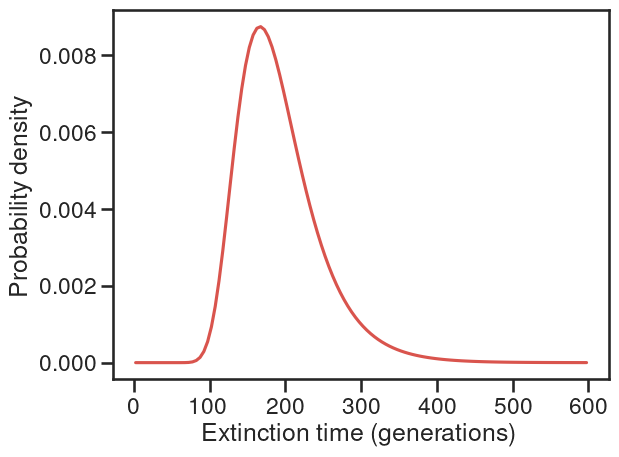

In [ ]:
theoryT = []
theoryP = []
binw = 5
t1 = 0
p1 = 0
for i in range(1, 121):
    t2 = i * binw
    p2 = prob_extinct(Z0, t2, 15, s, u)
    theoryT.append((t1+t2)/2)
    theoryP.append((p2-p1) / binw)
    t1 = t2
    p1 = p2
plt.plot(theoryT, theoryP, color=sns.xkcd_rgb['pale red'])
plt.ylabel('Probability density')
plt.xlabel('Extinction time (generations)');

## Stochastic simulations 

In [16]:
tt = []
for i in range(10000):
    tmpN, tmpZ, t = to_extinction(Z0, s, u)
    tt.append(t)
t = np.array(tt)
t.mean(), t.var(ddof=1), len(t)

(191.4383, 2802.7184649564956, 10000)

In [19]:
t.min(), t.max()

(81, 541)

In [22]:
bins = np.arange(10 * np.floor((t.min()-1)/10), 10 * np.ceil((t.max()+1)/10) + 1, 10)
bins

array([ 80.,  90., 100., 110., 120., 130., 140., 150., 160., 170., 180.,
       190., 200., 210., 220., 230., 240., 250., 260., 270., 280., 290.,
       300., 310., 320., 330., 340., 350., 360., 370., 380., 390., 400.,
       410., 420., 430., 440., 450., 460., 470., 480., 490., 500., 510.,
       520., 530., 540., 550.])

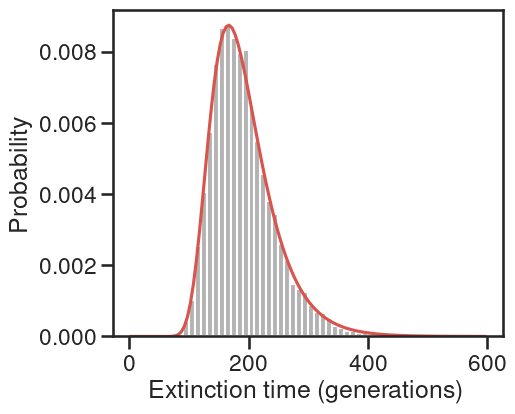

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.set_position([.212, .175, .78, .817])
ax.hist(t, bins=bins, density=True, color="0.7")
ax.plot(theoryT, theoryP, color=red)
ax.set_ylabel('Probability')
ax.set_xlabel('Extinction time (generations)')
fig.savefig('../figures/hist.pdf');

## Theoretical probability density

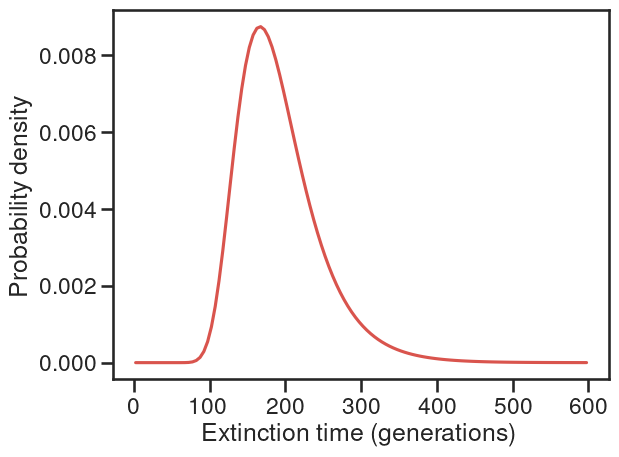

In [6]:
theoryT = []
theoryP = []
binw = 5
t1 = 0
p1 = 0
for i in range(1, 121):
    t2 = i * binw
    p2 = prob_extinct(Z0, t2, 15, s, u)
    theoryT.append((t1+t2)/2)
    theoryP.append((p2-p1) / binw)
    t1 = t2
    p1 = p2
plt.plot(theoryT, theoryP, color=sns.xkcd_rgb['pale red'])
plt.ylabel('Probability density')
plt.xlabel('Extinction time (generations)');

## Stochastic simulations 

In [9]:
tt = []
for i in range(10000):
    tmpN, tmpZ, t = to_extinction(Z0, s, u)
    tt.append(t)
t = np.array(tt)
t.mean(), t.var(ddof=1), len(t)

(192.4891, 2967.066787868787, 10000)

In [11]:
t.min(), t.max()

(74, 529)

In [12]:
bins = np.arange(65, 536, 10)
bins

array([ 65,  75,  85,  95, 105, 115, 125, 135, 145, 155, 165, 175, 185,
       195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315,
       325, 335, 345, 355, 365, 375, 385, 395, 405, 415, 425, 435, 445,
       455, 465, 475, 485, 495, 505, 515, 525, 535])

Bbox(x0=0.212, y0=0.175, x1=0.992, y1=0.992)


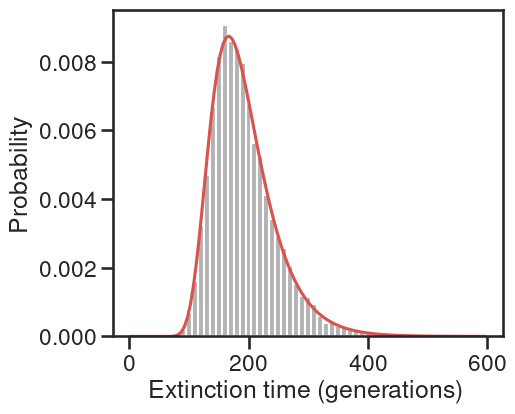

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.set_position([.212, .175, .78, .817])
print(ax.get_position())
ax.hist(t, bins=bins, density=True, color="0.7")
ax.plot(theoryT, theoryP, color=red)
ax.set_ylabel('Probability')
ax.set_xlabel('Extinction time (generations)')
fig.savefig('../figures/hist2.pdf');